In [1]:
import xarray as xr
import numpy as np
import glob
import os
import sys


In [2]:
def check_data_region(file,latmin,latmax,lonmin,lonmax):
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ind_region=np.where((latfile < latmax) & (latfile > latmin) & 
        (lonfile < lonmax) & (lonfile > lonmin))
    if len(ind_region[0]) > 0:
        check=1
    else:
        check=0
    return check,ind_region
    

def check_data_nonan(file,ind_region):
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ssh=ds.ssh_karin    
    numlines_region=ind_region[0]
    numlines_region_unique=np.unique(numlines_region)
    for k in np.arange(len(numlines_region_unique)):
        isdata=np.where(np.isnan(ssh[numlines_region_unique[k],:])==False)
        if len(isdata[0])>0:
            check=1
        else:
            check=0
        return check,isdata


In [77]:
    region = 'MEDWEST'
    phase = 'calval_phase'
    data = 'karin'


In [78]:
    simu='eNATL60-BLB002' # or eNATL60-BLBT02

    tdir='/work/ALT/swot/aval/wisa/tmp/inland_cleaning/swot_simulator_'+phase+'/'+simu+'-SSH-1h/'+data
    files=glob.glob(tdir+'/*/*nc')

    #parameters for the region to consider
    if (region == 'NANFL'):
        latmin=30
        latmax=40
        lonmin=-55+360
        lonmax=-40+360
    if (region == 'MEDWEST'):
        latmin=35.1
        latmax=44.4
        lonmin=-5.7
        lonmax=9.6


In [79]:
print(latmin,latmax,lonmin,lonmax)

35.1 44.4 -5.7 9.6


In [6]:
print(np.arange(len(files)))

[   0    1    2 ... 4380 4381 4382]


In [7]:
print(len(files))

4383


In [196]:
for f in np.arange(len(files)):
        file=files[f]
        check, ind_region = check_data_region(file,latmin,latmax,lonmin,lonmax)
        if check == 1:
            print(f)
   

4
6
14
17
21
33
37
44
45
53
57
60
62
65


KeyboardInterrupt: 

In [206]:
f=4

In [207]:
        file=files[f]
        nfile=file.split('/')[-1]
        odir='/work/ALT/odatis/eNATL60/alberta/SWOT-sim/'+region+'/'+phase+'/'+data+'/'
        filename=odir+nfile


In [208]:
print(filename)

/work/ALT/odatis/eNATL60/alberta/SWOT-sim/MEDWEST/calval_phase/karin/SWOT_L2_LR_SSH_Basic_393_020_20100725T035323_20100725T044429_DG10_01.nc


In [209]:
!ls $filename

ls: cannot access /work/ALT/odatis/eNATL60/alberta/SWOT-sim/MEDWEST/calval_phase/karin/SWOT_L2_LR_SSH_Basic_393_020_20100725T035323_20100725T044429_DG10_01.nc: No such file or directory


In [210]:
if not os.path.exists(filename):
    print('ok')

ok


In [211]:
check, ind_region = check_data_region(file,latmin,latmax,lonmin,lonmax)

In [212]:
print(check)

1


In [213]:
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude


In [235]:
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    if region == 'NANFL':
        ind_region=np.where((latfile < latmax) & (latfile > latmin) & 
        (lonfile < lonmax) & (lonfile > lonmin))
    if region == 'MEDWEST':
        ind_region1=np.where((latfile < latmax) & (latfile > latmin) & 
        (lonfile < lonmax) & (lonfile > 0))
        ind_region2=np.where((latfile < latmax) & (latfile > latmin) & 
        (lonfile < 360) & (lonfile > lonmin+360))


In [236]:
ind_region1

(array([2419, 2419, 2419, ..., 2961, 2961, 2961]),
 array([16, 17, 18, ..., 68, 69, 70]))

In [237]:
ind_region2

(array([2415, 2415, 2415, 2415, 2416, 2416, 2416, 2416, 2416, 2416, 2416,
        2417, 2417, 2417, 2417, 2417, 2417, 2417, 2417, 2417, 2417, 2417,
        2418, 2418, 2418, 2418, 2418, 2418, 2418, 2418, 2418, 2418, 2418,
        2418, 2418, 2418, 2418, 2419, 2419, 2419, 2419, 2419, 2419, 2419,
        2419, 2419, 2419, 2419, 2419, 2419, 2419, 2419, 2419, 2420, 2420,
        2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420, 2420,
        2420, 2420, 2420, 2421, 2421, 2421, 2421, 2421, 2421, 2421, 2421,
        2421, 2421, 2421, 2421, 2421, 2421, 2421, 2421, 2422, 2422, 2422,
        2422, 2422, 2422, 2422, 2422, 2422, 2422, 2422, 2422, 2422, 2422,
        2422, 2423, 2423, 2423, 2423, 2423, 2423, 2423, 2423, 2423, 2423,
        2423, 2423, 2423, 2423, 2423, 2424, 2424, 2424, 2424, 2424, 2424,
        2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2424, 2425, 2425,
        2425, 2425, 2425, 2425, 2425, 2425, 2425, 2425, 2425, 2425, 2425,
        2425, 2425, 2426, 2426, 2426, 

In [241]:
ind_region=np.concatenate((ind_region1[0],ind_region2[0]),axis=0)

In [246]:
len(ind_region)

37698

In [242]:
ind_region

array([2419, 2419, 2419, ..., 2476, 2477, 2478])

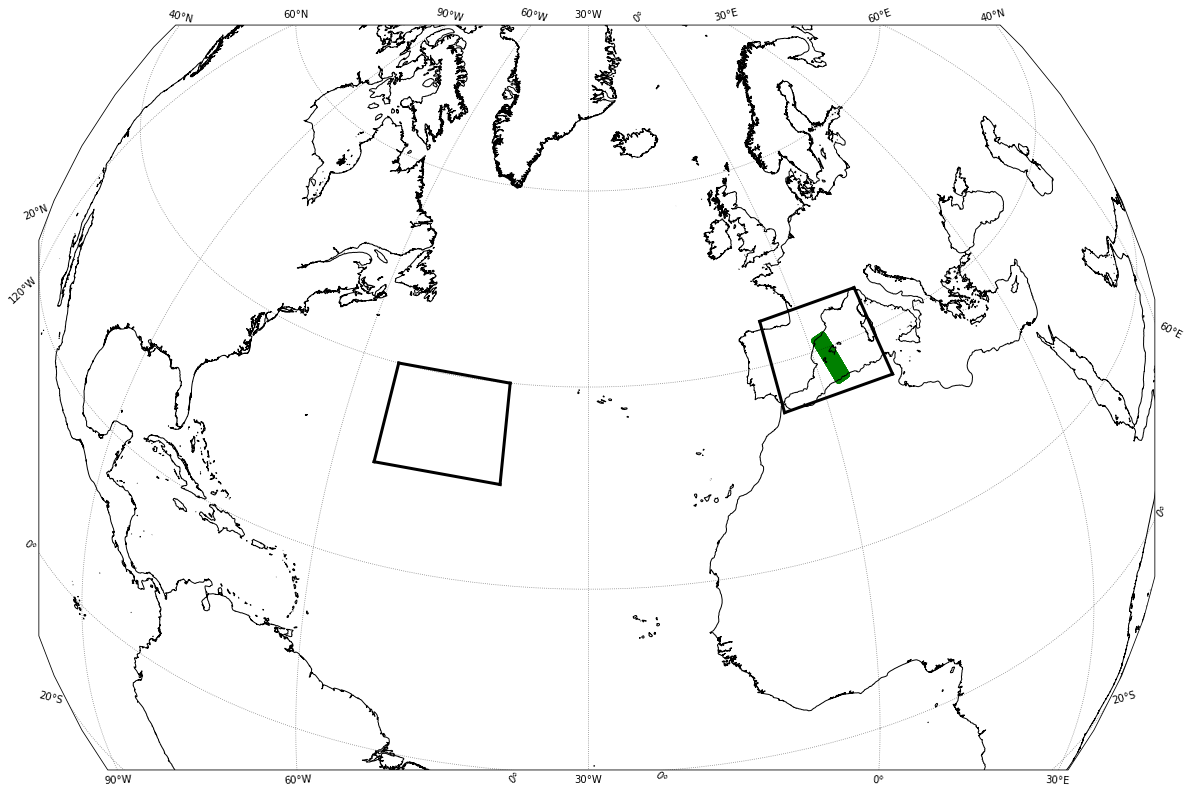

In [231]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 
latminN=30
latmaxN=40
lonminN=-55
lonmaxN=-40
latminM=35.1
latmaxM=44.4
lonminM=-5.7
lonmaxM=9.6
fig=plt.figure(figsize=(20,15))
#ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
ax.set_extent((-100, 46, 0, 67))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
#gl.top_labels = False
#gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminN, lonminN], [latminN, latmaxN],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxN, lonmaxN], [latminN, latmaxN],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminN, lonmaxN], [latminN, latminN],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminN, lonmaxN], [latmaxN, latmaxN],color='black',linewidth=3,transform=ccrs.PlateCarree())    
ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    
plt.scatter(lonfile[isdata,:],latfile[isdata,:], c='g', linewidth=0, s=18,transform=ccrs.PlateCarree());

In [220]:
lonfile

<xarray.DataArray 'longitude' (num_lines: 9868, num_pixels: 71)>
array([[286.081704, 286.081825, 286.081946, ..., 286.090747, 286.090894,
        286.091041],
       [286.16186 , 286.16209 , 286.162321, ..., 286.179115, 286.179395,
        286.179676],
       [286.24201 , 286.24235 , 286.242692, ..., 286.267477, 286.26789 ,
        286.268305],
       ...,
       [ 93.045377,  93.045586,  93.045795, ...,  93.058282,  93.058454,
         93.058626],
       [ 93.134006,  93.134081,  93.134156, ...,  93.138652,  93.138714,
         93.138776],
       [ 93.22264 ,  93.222581,  93.222523, ...,  93.219026,  93.218979,
         93.218931]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 77.03 77.05 ... -77.05 -77.03
    longitude  (num_lines, num_pixels) float64 286.1 286.1 286.1 ... 93.22 93.22
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      longitude (degrees East)
    standard_name:  longitude
    units:          degrees_east
    valid_min:      0
    valid_max:      359999999
    comment:        Longitude of measurement. East longitude relative to Gree...

In [228]:
check2,isdata = check_data_nonan(file,ind_region)

In [230]:
print(lonfile[isdata,:])

<xarray.DataArray 'longitude' (num_lines: 266, num_pixels: 71)>
array([[0.741144, 0.764318, 0.787495, ..., 2.323888, 2.347266, 2.370647],
       [0.746942, 0.77011 , 0.793282, ..., 2.329286, 2.352659, 2.376034],
       [0.752737, 0.775899, 0.799065, ..., 2.334682, 2.358048, 2.381417],
       ...,
       [2.146264, 2.168113, 2.189964, ..., 3.636973, 3.65897 , 3.680968],
       [2.151165, 2.173009, 2.194856, ..., 3.64155 , 3.663541, 3.685535],
       [2.156064, 2.177903, 2.199745, ..., 3.646124, 3.668111, 3.690099]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 41.15 41.16 41.16 ... 36.78 36.79
    longitude  (num_lines, num_pixels) float64 0.7411 0.7643 ... 3.668 3.69
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      longitude (degrees East)
    standard_name:  longitude
    units:          degrees_east
    valid_min:      0
    valid_max:      359999999
    comment:        Longitude of measurement. East longitude relative to Gree...


In [99]:
print(check2)

0


In [100]:
ind_region

(array([2419, 2419, 2419, ..., 2961, 2961, 2961]),
 array([16, 17, 18, ..., 68, 69, 70]))

In [215]:
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ssh=ds.ssh_karin    
    numlines_region=ind_region[0]
    numlines_region_unique=np.unique(numlines_region)


In [217]:
print(lonfile[-1,:])

<xarray.DataArray 'longitude' (num_pixels: 71)>
array([93.22264 , 93.222581, 93.222523, 93.222464, 93.222406, 93.222348,
       93.22229 , 93.222232, 93.222175, 93.222117, 93.22206 , 93.222003,
       93.221946, 93.22189 , 93.221833, 93.221777, 93.221721, 93.221665,
       93.221609, 93.221554, 93.221498, 93.221443, 93.221388, 93.221333,
       93.221278, 93.221224, 93.221169, 93.221115, 93.221061, 93.221007,
       93.220953, 93.2209  , 93.220847, 93.220793, 93.22074 , 93.220687,
       93.220634, 93.220582, 93.220529, 93.220477, 93.220425, 93.220373,
       93.220321, 93.22027 , 93.220218, 93.220167, 93.220115, 93.220064,
       93.220014, 93.219963, 93.219912, 93.219862, 93.219811, 93.219761,
       93.219711, 93.219661, 93.219612, 93.219562, 93.219513, 93.219463,
       93.219414, 93.219365, 93.219317, 93.219268, 93.219219, 93.219171,
       93.219123, 93.219074, 93.219026, 93.218979, 93.218931])
Coordinates:
    latitude   (num_pixels) float64 ...
    longitude  (num_pixels) float

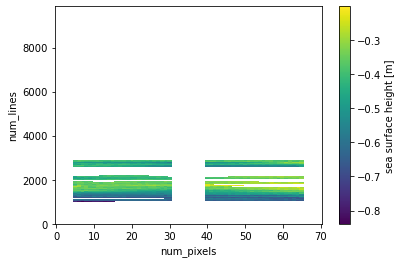

In [222]:
ssh.plot()

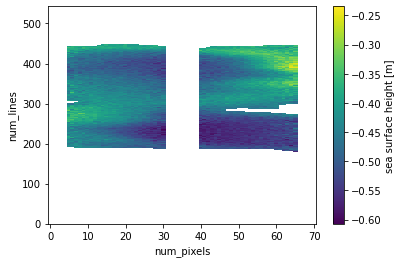

In [223]:
ssh[numlines_region_unique,:].plot()

In [224]:
ssh[numlines_region_unique[200],:]

<xarray.DataArray 'ssh_karin' (num_pixels: 71)>
array([    nan,     nan,     nan,     nan,     nan, -0.472 , -0.482 , -0.4524,
       -0.4401, -0.4543, -0.4588, -0.4734, -0.4756, -0.4798, -0.4697, -0.4546,
       -0.4774, -0.4899, -0.4678, -0.4901, -0.4775, -0.4888, -0.4859, -0.4558,
       -0.4974, -0.4971, -0.4883, -0.4945, -0.5026, -0.5104, -0.4968,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
       -0.5281, -0.5551, -0.5555, -0.5587, -0.5351, -0.5499, -0.5353, -0.5551,
       -0.5428, -0.5362, -0.5507, -0.5593, -0.552 , -0.5366, -0.5394, -0.5487,
       -0.5607, -0.5357, -0.5249, -0.5229, -0.536 , -0.5428, -0.5509, -0.5465,
       -0.566 , -0.4818,     nan,     nan,     nan,     nan,     nan])
Coordinates:
    latitude   (num_pixels) float64 40.84 40.84 40.85 ... 41.12 41.13 41.13
    longitude  (num_pixels) float64 0.845 0.8681 0.8912 ... 2.421 2.444 2.467
Dimensions without coordinates: num_pixels
Attributes:
    long_name:      sea surface height
    standard_name:  sea surface height above reference ellipsoid
    units:          m
    valid_min:      -15000000
    valid_max:      150000000
    comment:        Fully corrected sea surface height measured by KaRIn. The...
    post_process:   land masked used bilinear mask

In [225]:
isdata=np.where(np.isnan(ssh[numlines_region_unique[200],:])==False)

In [226]:
isdata

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
        65]),)

In [227]:
def check_data_nonan(file,ind_region):
    ds=xr.open_dataset(file)
    latfile=ds.latitude
    lonfile=ds.longitude
    ssh=ds.ssh_karin    
    numlines_region=ind_region[0]
    numlines_region_unique=np.unique(numlines_region)
    check=0
    isdata_all=[]
    for k in np.arange(len(numlines_region_unique)):
        isdata=np.where(np.isnan(ssh[numlines_region_unique[k],:])==False)
        if len(isdata[0])>0:
            check=1
            isdata_all.append(numlines_region_unique[k])

    return check,isdata_all


In [114]:
k=200
isdata=np.where(np.isnan(ssh[numlines_region_unique[k],:])==False)

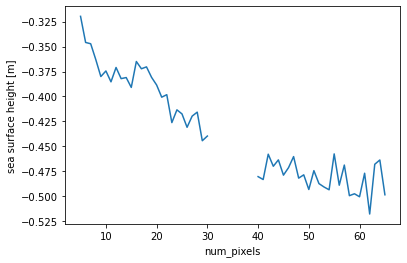

In [116]:
ssh[numlines_region_unique[k],:].plot()

In [118]:
check2,isdata = check_data_nonan(file,ind_region)

In [119]:
print(check2)

1


In [120]:
print(isdata)

[2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 276

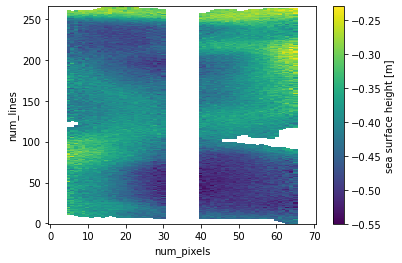

In [121]:
ssh[isdata,:].plot()

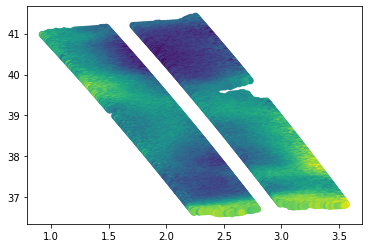

In [122]:
import matplotlib.pyplot as plt
plt.scatter(lonfile[isdata,:], latfile[isdata,:],c=ssh[isdata,:])